# TASK 6.2 - Exploring Relationships

#### Table of Content

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. Exploring My Questions
5. Exploring Relationships
    1. HEATMAP & SCATTERPLOTS (correlations in general)
    2. HEATMAP & SCATTERPLOTS (correlation related to my questions)
    3. PAIR PLOTS
    4. CATEGORICAL PLOTS
6. New Questions & Hypotheses



# 1. Importing Libraries & Options

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime

In [2]:
# Ensuring the charts I create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
pd.options.display.max_columns = None

# 2. Importing Dataframe

In [4]:
# Creating a path

path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis'

In [5]:
# Importing dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.csv'), dtype={'host_listings_count': 'str'}, index_col = False)

# 3. Checking the Data

In [6]:
df.shape

(66582, 45)

In [7]:
# Converting 3 variables to date format

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review']) 
df['last_review'] = pd.to_datetime(df['last_review']) 

In [8]:
# Checking data types

df.dtypes

id                                                       int64
host_id                                                  int64
host_since                                      datetime64[ns]
host_response_time                                      object
host_resp_rate_pct                                       int64
host_accept_rate_pct                                     int64
host_is_superhost                                       object
host_listings_count                                     object
host_has_profile_pic                                    object
host_identity_verified                                  object
neighbourhood_cleansed                                  object
latitude                                               float64
longitude                                              float64
property_type                                           object
room_type                                               object
accommodates                                           

In [9]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,54730,2009-11-16,within a few hours,100,85,f,3.0,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,2,1 shared bath,1.0,1.76,65.0,1,29,t,26,56,86,361,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,2,1,1,0,0.16
1,15400,60302,2009-12-05,within a day,67,50,f,1.0,t,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.00,75.0,3,50,t,0,0,0,4,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,1,1,0,0,0.61
2,17402,67564,2010-01-04,within an hour,80,70,f,18.0,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.00,265.0,4,365,t,4,34,60,295,43,1,0,2011-03-21,2021-06-28,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,1,1,0,0,0.33
3,17506,67915,2010-01-05,Unknown,89,75,f,3.0,t,t,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.00,150.0,3,21,t,29,59,89,364,0,0,0,1900-01-01,1900-01-01,4.54,4.73,4.62,4.79,4.80,4.75,4.64,f,2,0,2,0,4.64
4,25123,103583,2010-04-05,Unknown,89,75,f,3.0,t,t,Barnet,51.57438,-0.21081,Private room in residential home,Private room,2,1.5 shared baths,1.0,1.76,29.0,10,1120,t,0,0,0,0,129,0,0,2010-04-14,2020-03-15,4.78,4.70,4.94,4.91,4.89,4.45,4.74,t,3,0,3,0,0.91


# 4. Exploring My Questions

> #### How many listings are there in London?

In [10]:
df['id'].nunique() # 66582 listings in London

66582

> #### How many hosts? How many of them are super-hosts?

In [18]:
df['host_id'].nunique() # 44650 hosts in London

44650

In [19]:
# Retaining only unique hosts

df_uniquehost = df.drop_duplicates(subset=['host_id'])

In [27]:
df_uniquehost['host_id'].count() # checking query

44650

In [28]:
# Now I can check how many are superhost

df_uniquehost['host_is_superhost'].value_counts() # 5444 of them are superhost

f    39206
t     5444
Name: host_is_superhost, dtype: int64

> #### Where are the Airbnbs located? Where is the biggest concentration? 

In [13]:
df['neighbourhood_cleansed'].value_counts()  

Westminster               7018
Tower Hamlets             5536
Hackney                   5114
Camden                    4522
Kensington and Chelsea    4506
Southwark                 3926
Islington                 3879
Lambeth                   3725
Wandsworth                3442
Hammersmith and Fulham    2953
Lewisham                  1910
Brent                     1866
Haringey                  1851
Newham                    1602
Ealing                    1534
Barnet                    1517
Greenwich                 1432
Waltham Forest            1247
Merton                    1098
Croydon                   1055
Richmond upon Thames      1025
Hounslow                   983
Redbridge                  615
Hillingdon                 586
Enfield                    559
Bromley                    545
Kingston upon Thames       484
Harrow                     419
Barking and Dagenham       410
City of London             384
Bexley                     285
Sutton                     281
Havering

> #### What's the average price of an Airbnb in London? By area?

In [14]:
df['price_usd'].mean() # Average price per night is $145

145.26450091616354

In [15]:
df['price_usd'].describe() # There are some strong outliers (e.g. $18557 per night!)

count    66582.000000
mean       145.264501
std        350.056700
min          0.000000
25%         46.000000
50%         83.000000
75%        145.000000
max      18557.000000
Name: price_usd, dtype: float64

<AxesSubplot:ylabel='Frequency'>

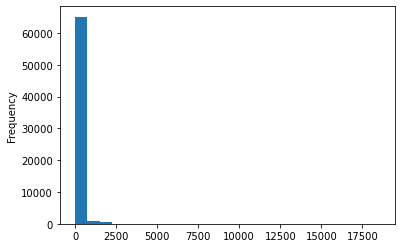

In [16]:
df['price_usd'].plot.hist(bins = 25) # I can see most listing are in the first bin

In [17]:
df.groupby('neighbourhood_cleansed')['price_usd'].mean() 

# Average price per night varies greatly between neighbourhood

neighbourhood_cleansed
Barking and Dagenham       80.992683
Barnet                    135.920237
Bexley                     69.217544
Brent                     126.709539
Bromley                    81.739450
Camden                    159.132464
City of London            237.268229
Croydon                    63.727962
Ealing                     95.843546
Enfield                    75.021467
Greenwich                 140.094274
Hackney                   106.943684
Hammersmith and Fulham    182.060278
Haringey                   97.986494
Harrow                     82.262530
Havering                   93.758242
Hillingdon                 89.877133
Hounslow                   98.134283
Islington                 145.903583
Kensington and Chelsea    221.906347
Kingston upon Thames      107.778926
Lambeth                   102.947651
Lewisham                   96.002618
Merton                    124.598361
Newham                     97.415106
Redbridge                  85.817886
Richmond upon T

> #### Does the 'superhost' status of host correlate with the positive rating of Airbnbs?

In [18]:
df.groupby('host_is_superhost')['review_scores_rating'].mean() # YES, superhost are better rated!

host_is_superhost
f    4.493269
t    4.822667
Name: review_scores_rating, dtype: float64

> #### Does the 'superhost' status correlate with higher price per night?

In [19]:
df.groupby('host_is_superhost')['price_usd'].mean() # NO, superhost charge less per night!

host_is_superhost
f    148.954485
t    122.917338
Name: price_usd, dtype: float64

### OTHER QUESTIONS TO EXPLORE THROUGH CORRELATIONS:

### HEATMAP & SCATTERPLOT

> Q1 Does the rating/postive reviews of an Airbnb influence the price? >> ('review_scores_rating' vs 'price_usd')

> Q2 Is there a correlation between positive reviews and availability? >> ('review_scores_rating' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365') 
                                                                                  
> Q3 Is there a correlation between host response rate and availability? >> ('host_resp_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365') 

>  Q4 Is there a correlation between host acceptance rate and availability? >> ('host_accept_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

> Q5 Is there a correlation between host acceptance rate and reviews? >> ('host_accept_rate_pct' vs 'review_scores_rating')


### PAIR PLOT

> What is the max & min amount of listings owned by hosts? What's the average?

# 5. Exploring Relationships

## A. HEATMAP & SCATTERPLOTS (correlations in general)

In [20]:
# Creating a subset to look at correlation in general

sub = df[['host_response_time', 'host_resp_rate_pct', 'host_accept_rate_pct', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price_usd', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

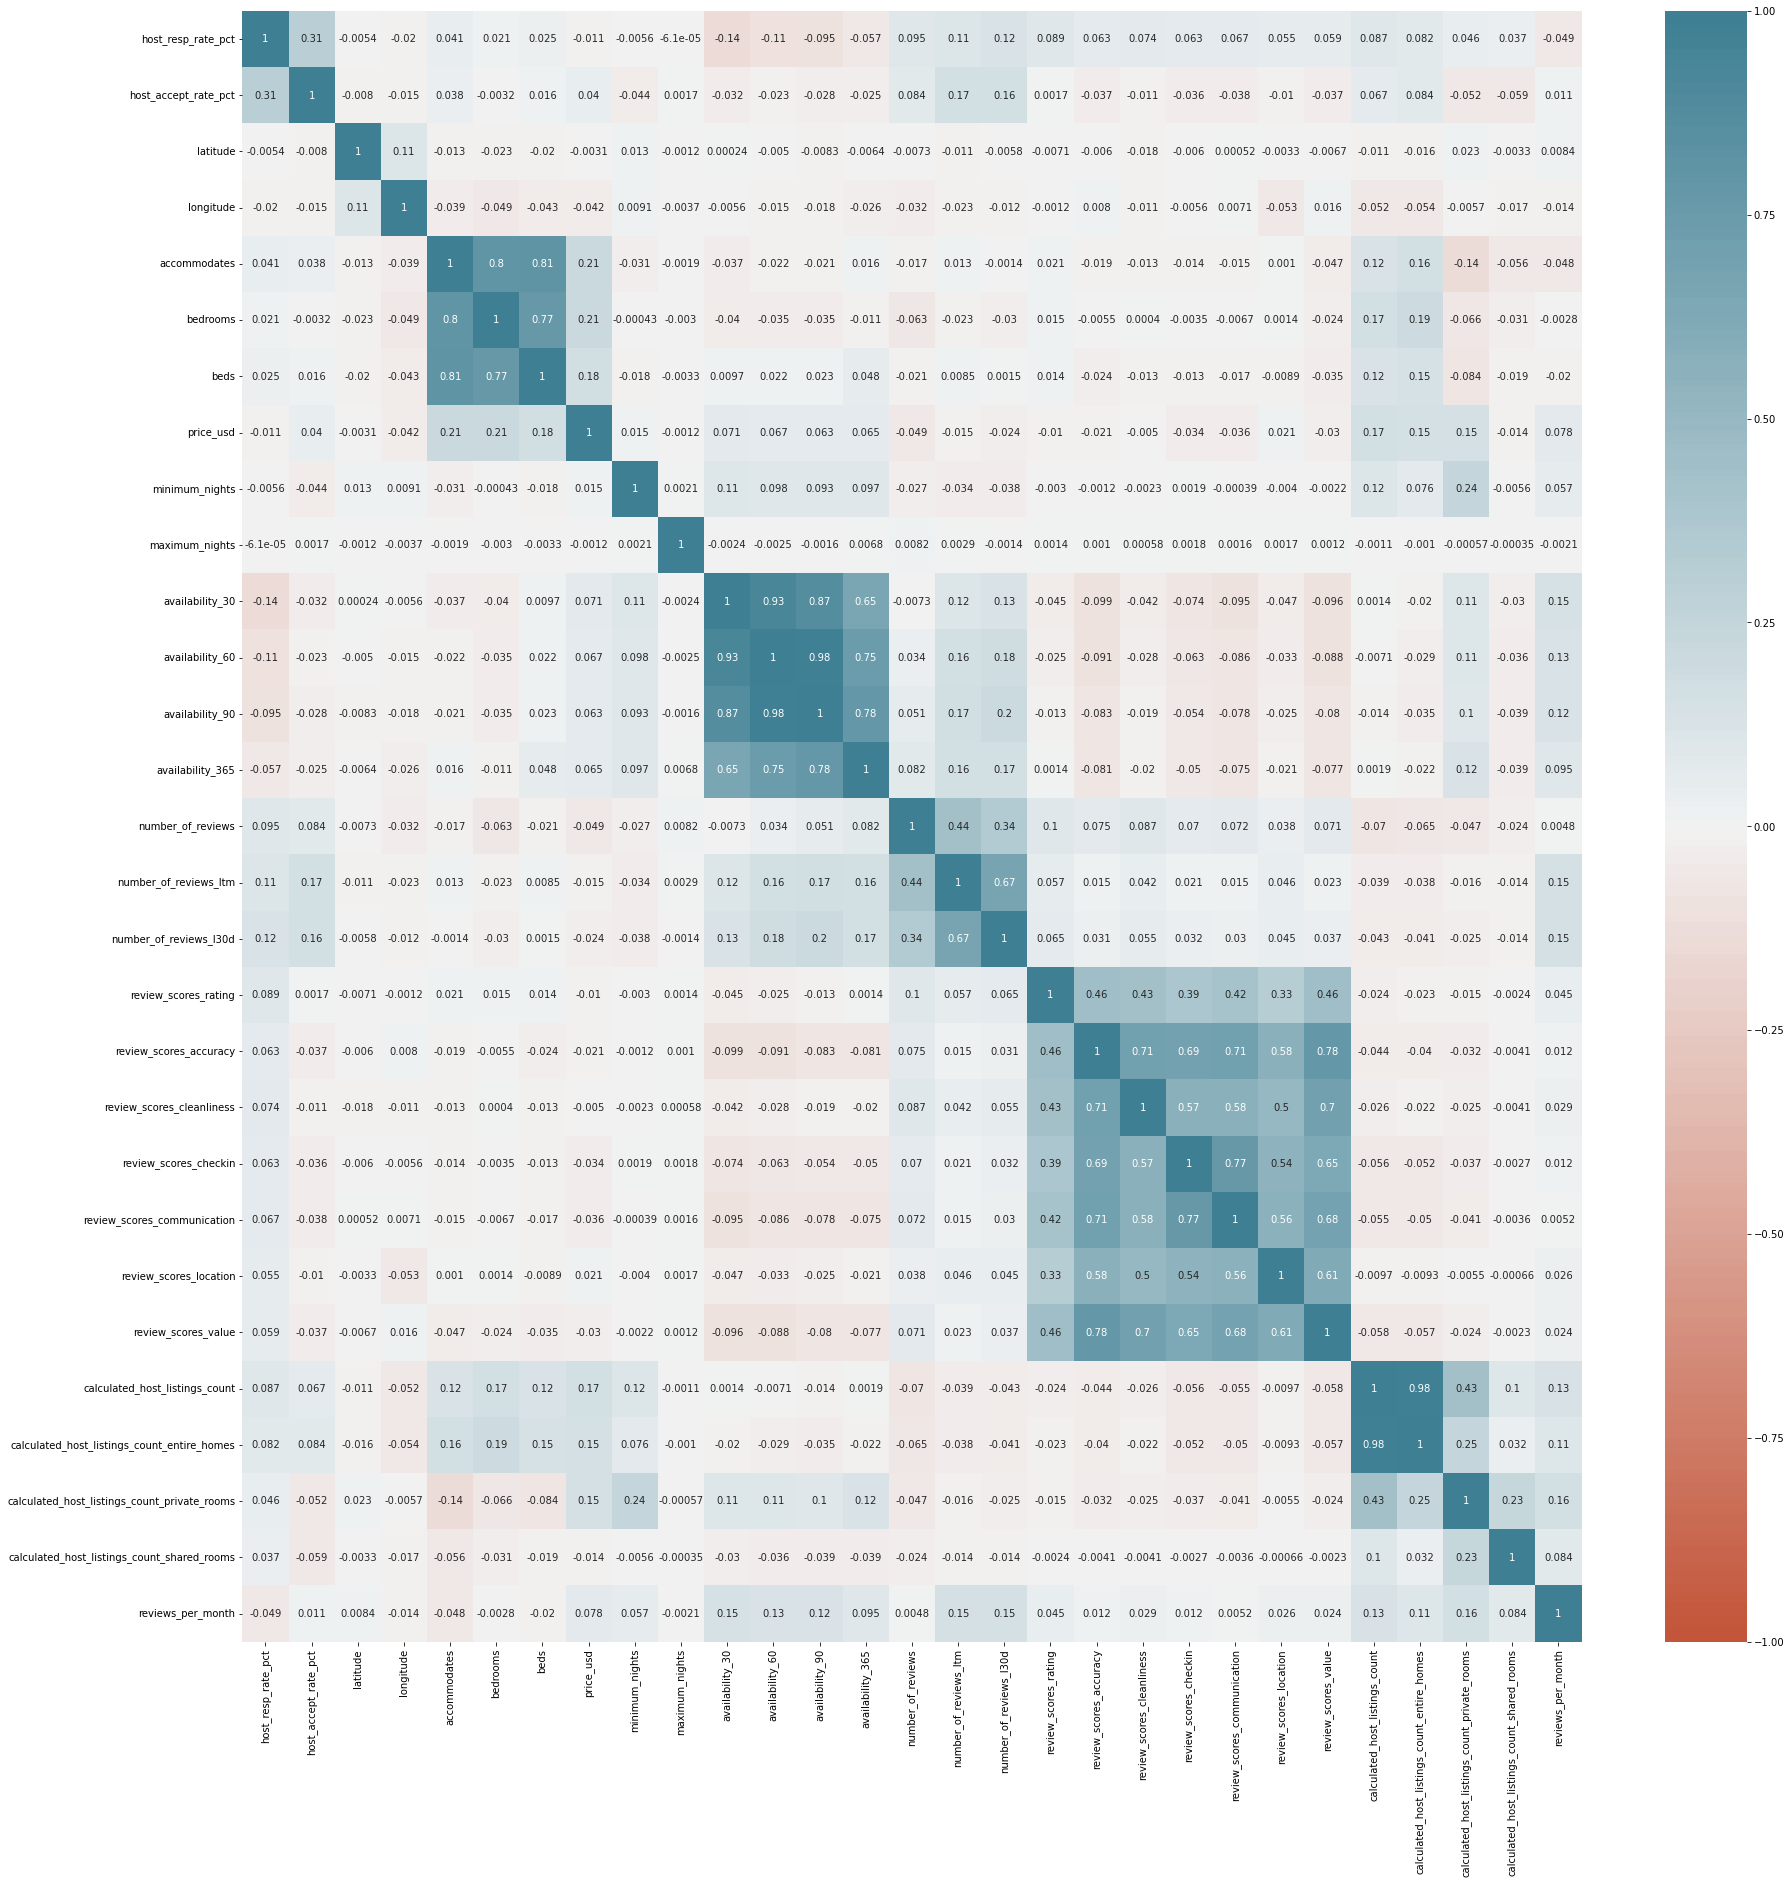

In [21]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))

# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax = ax) 

#### COMMENTS ABOUT THE GENERAL HEATMAP

> #### When looking at the whole dataframe, I cannot see many strong correlations, which I guess could be expected considering the high number of variables. 

> #### There are "clusters" of positive correlations, such as: 

> #### 1. Accomodates (Number of Guests) and: Bedrooms [0.8, very strong postive], Beds [0.81, very strong positive], Price [0.21, weak positive]

> #### 2. Availability status 30, 60, 90, 365 (which makes sense) 

> #### 3. There's a weak but postive correlation between availability status and number of reviews received

> #### 4. There's a cluster of postive correlation between the review breakdown, indicating that postive reviews tend to be about all aspects of the airbnb

#### STRONGEST CORRELATION

> One of the strongest correlation is accomodates vs bedrooms. It makes sense as the more people an Airbnb can accomodate, the more room we'd expect it to have (and the more beds). 

> On the scatterplot below, we can see there are some strange outliers; for example top left, a listing with over 20 bedrooms accomodates 2 (!?), likewise, bottom right there are a few listings that have only a couple of rooms which can accomodate 14-16 people. 

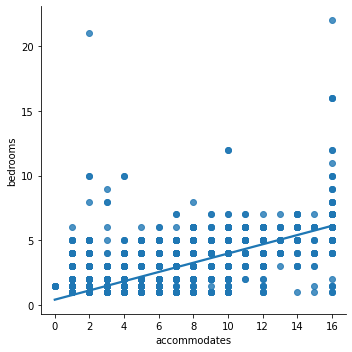

In [22]:
# Scatterplot accomodates vs bedrooms (strong correlation)

sns.lmplot(x = 'accommodates', y = 'bedrooms', data = df)

## B. HEATMAP & SCATTERPLOTS (correlation related to my questions)

In [23]:
# Creating a subset to look at correlations related to my questions

sub1 = df[['review_scores_rating', 'price_usd', 'host_resp_rate_pct',
           'host_accept_rate_pct', 'availability_30', 'availability_60', 
           'availability_90', 'availability_365']]

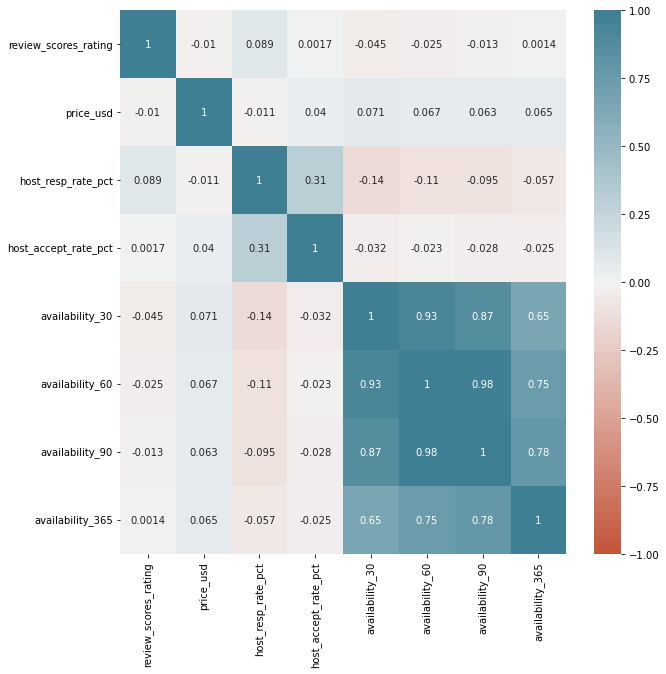

In [24]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax = ax) 

#### HEATMAP Q1

> Q1: Does the rating/postive reviews of an Airbnb influence the price? >> ('review_scores_rating' vs 'price_usd')

> #### A1: According to the heatmap, no, which is surprising. Looking at the scatterplot below however, I feel like further investigation is needed. because it does look like there's a correlation. The 0 reviews might be skewing the results and are probably "new listings" rather than true 0 (as host would not be able to rent property surely). 

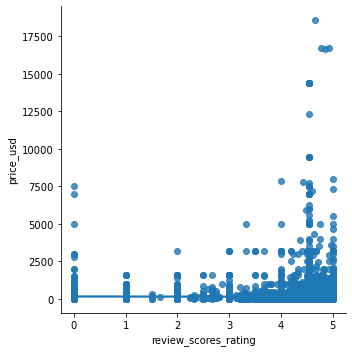

In [25]:
# Scatterplot related to my Q1

sns.lmplot(x = 'review_scores_rating', y = 'price_usd', data = df)

<AxesSubplot:ylabel='Frequency'>

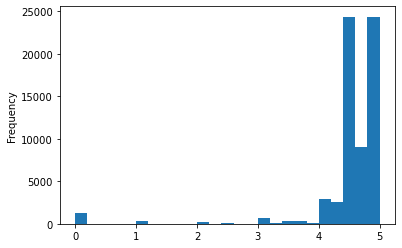

In [26]:
# Histogram related to my Q1

df['review_scores_rating'].plot.hist(bins = 25)

In [27]:
df['review_scores_rating'].describe()

# Most reviews are above 4.5, I will derivate a new column in a future script to explore this further 

count    66582.000000
mean         4.539952
std          0.776379
min          0.000000
25%          4.540000
50%          4.610000
75%          4.940000
max          5.000000
Name: review_scores_rating, dtype: float64

#### HEATMAP Q2

> Q2: Is there a correlation between positive reviews and availability? >> ('review_scores_rating' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365') 

> #### A2: The correlation is very weak but I can see that the better the rating, the less listings are available.

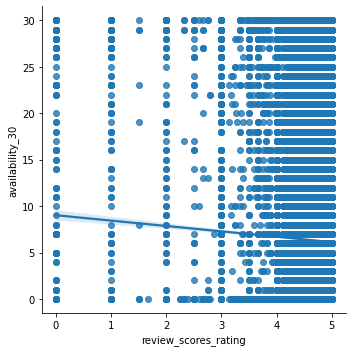

In [28]:
# Scatterplot related to my Q2

sns.lmplot(x = 'review_scores_rating', y = 'availability_30', data = df)

#### HEATMAP Q3

> Q3: Is there a correlation between host response rate and availability? >> ('host_resp_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365') 

> #### A3: There is a slight negative correlation between host reponse rate and availability; this mean the more responsive the host is, the less available the listing is available. 

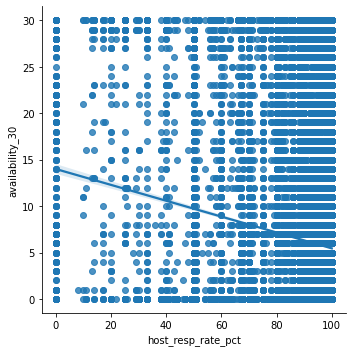

In [29]:
# Scatterplot related to my Q3

sns.lmplot(x = 'host_resp_rate_pct', y = 'availability_30', data = df)

#### HEATMAP Q4

>  Q4: Is there a correlation between host acceptance rate and availability? >> ('host_accept_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

> #### A4: Yes, but not enough to be relevant

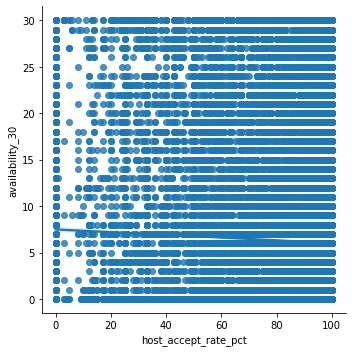

In [30]:
# Scatterplot related to my Q4

sns.lmplot(x = 'host_accept_rate_pct', y = 'availability_30', data = df)

#### HEATMAP Q5

> Q5: Is there a correlation between host acceptance rate and reviews? >> ('host_accept_rate_pct' vs 'review_scores_rating')

> #### A5: No

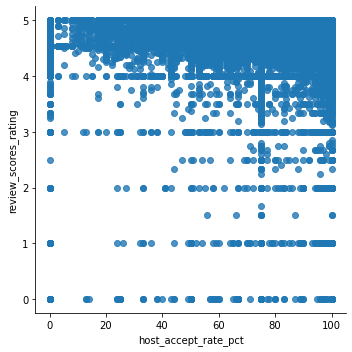

In [31]:
# Scatterplot related to my Q5

sns.lmplot(x = 'host_accept_rate_pct', y = 'review_scores_rating', data = df)

## C. PAIR PLOTS

> Please note: Even though the exercise calls to create a pair plot of the entire dataset, doing so crashes my computer as the dataset has so many columns. I am therefor creating subsets to explore the data through multiple pair plots. 

In [32]:
# PAIR PLOT 1 - Keeping only some variables

sub_pp1 = df[['accommodates', 'bedrooms', 'beds', 'price_usd']]

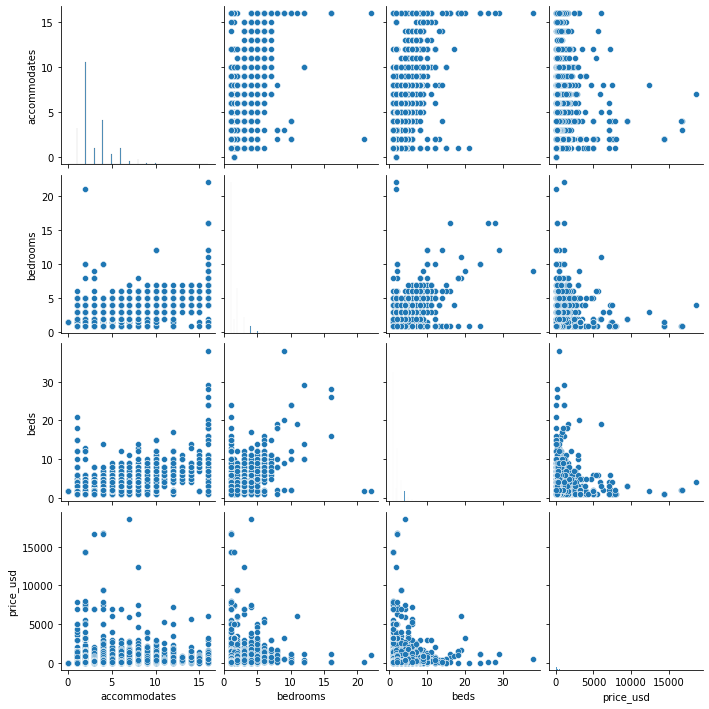

In [33]:
# Creating pair plot 1

g = sns.pairplot(sub_pp1)

In [34]:
df['accommodates'].max()

16

> ### COMMENT: On PP1 I can see that apart from a few strong outliers, most of the data is within the same range (e.g.: most price < $5000, most bed < 12, most bedrooms <8) . Moreover, I feel like Airbnb must have a limit on how many people a listing can accomodate, as the maximum is 16. 

In [35]:
# PAIR PLOT 2 - Keeping only some variables

sub_pp2 = df[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
              'review_scores_value', 'reviews_per_month']]

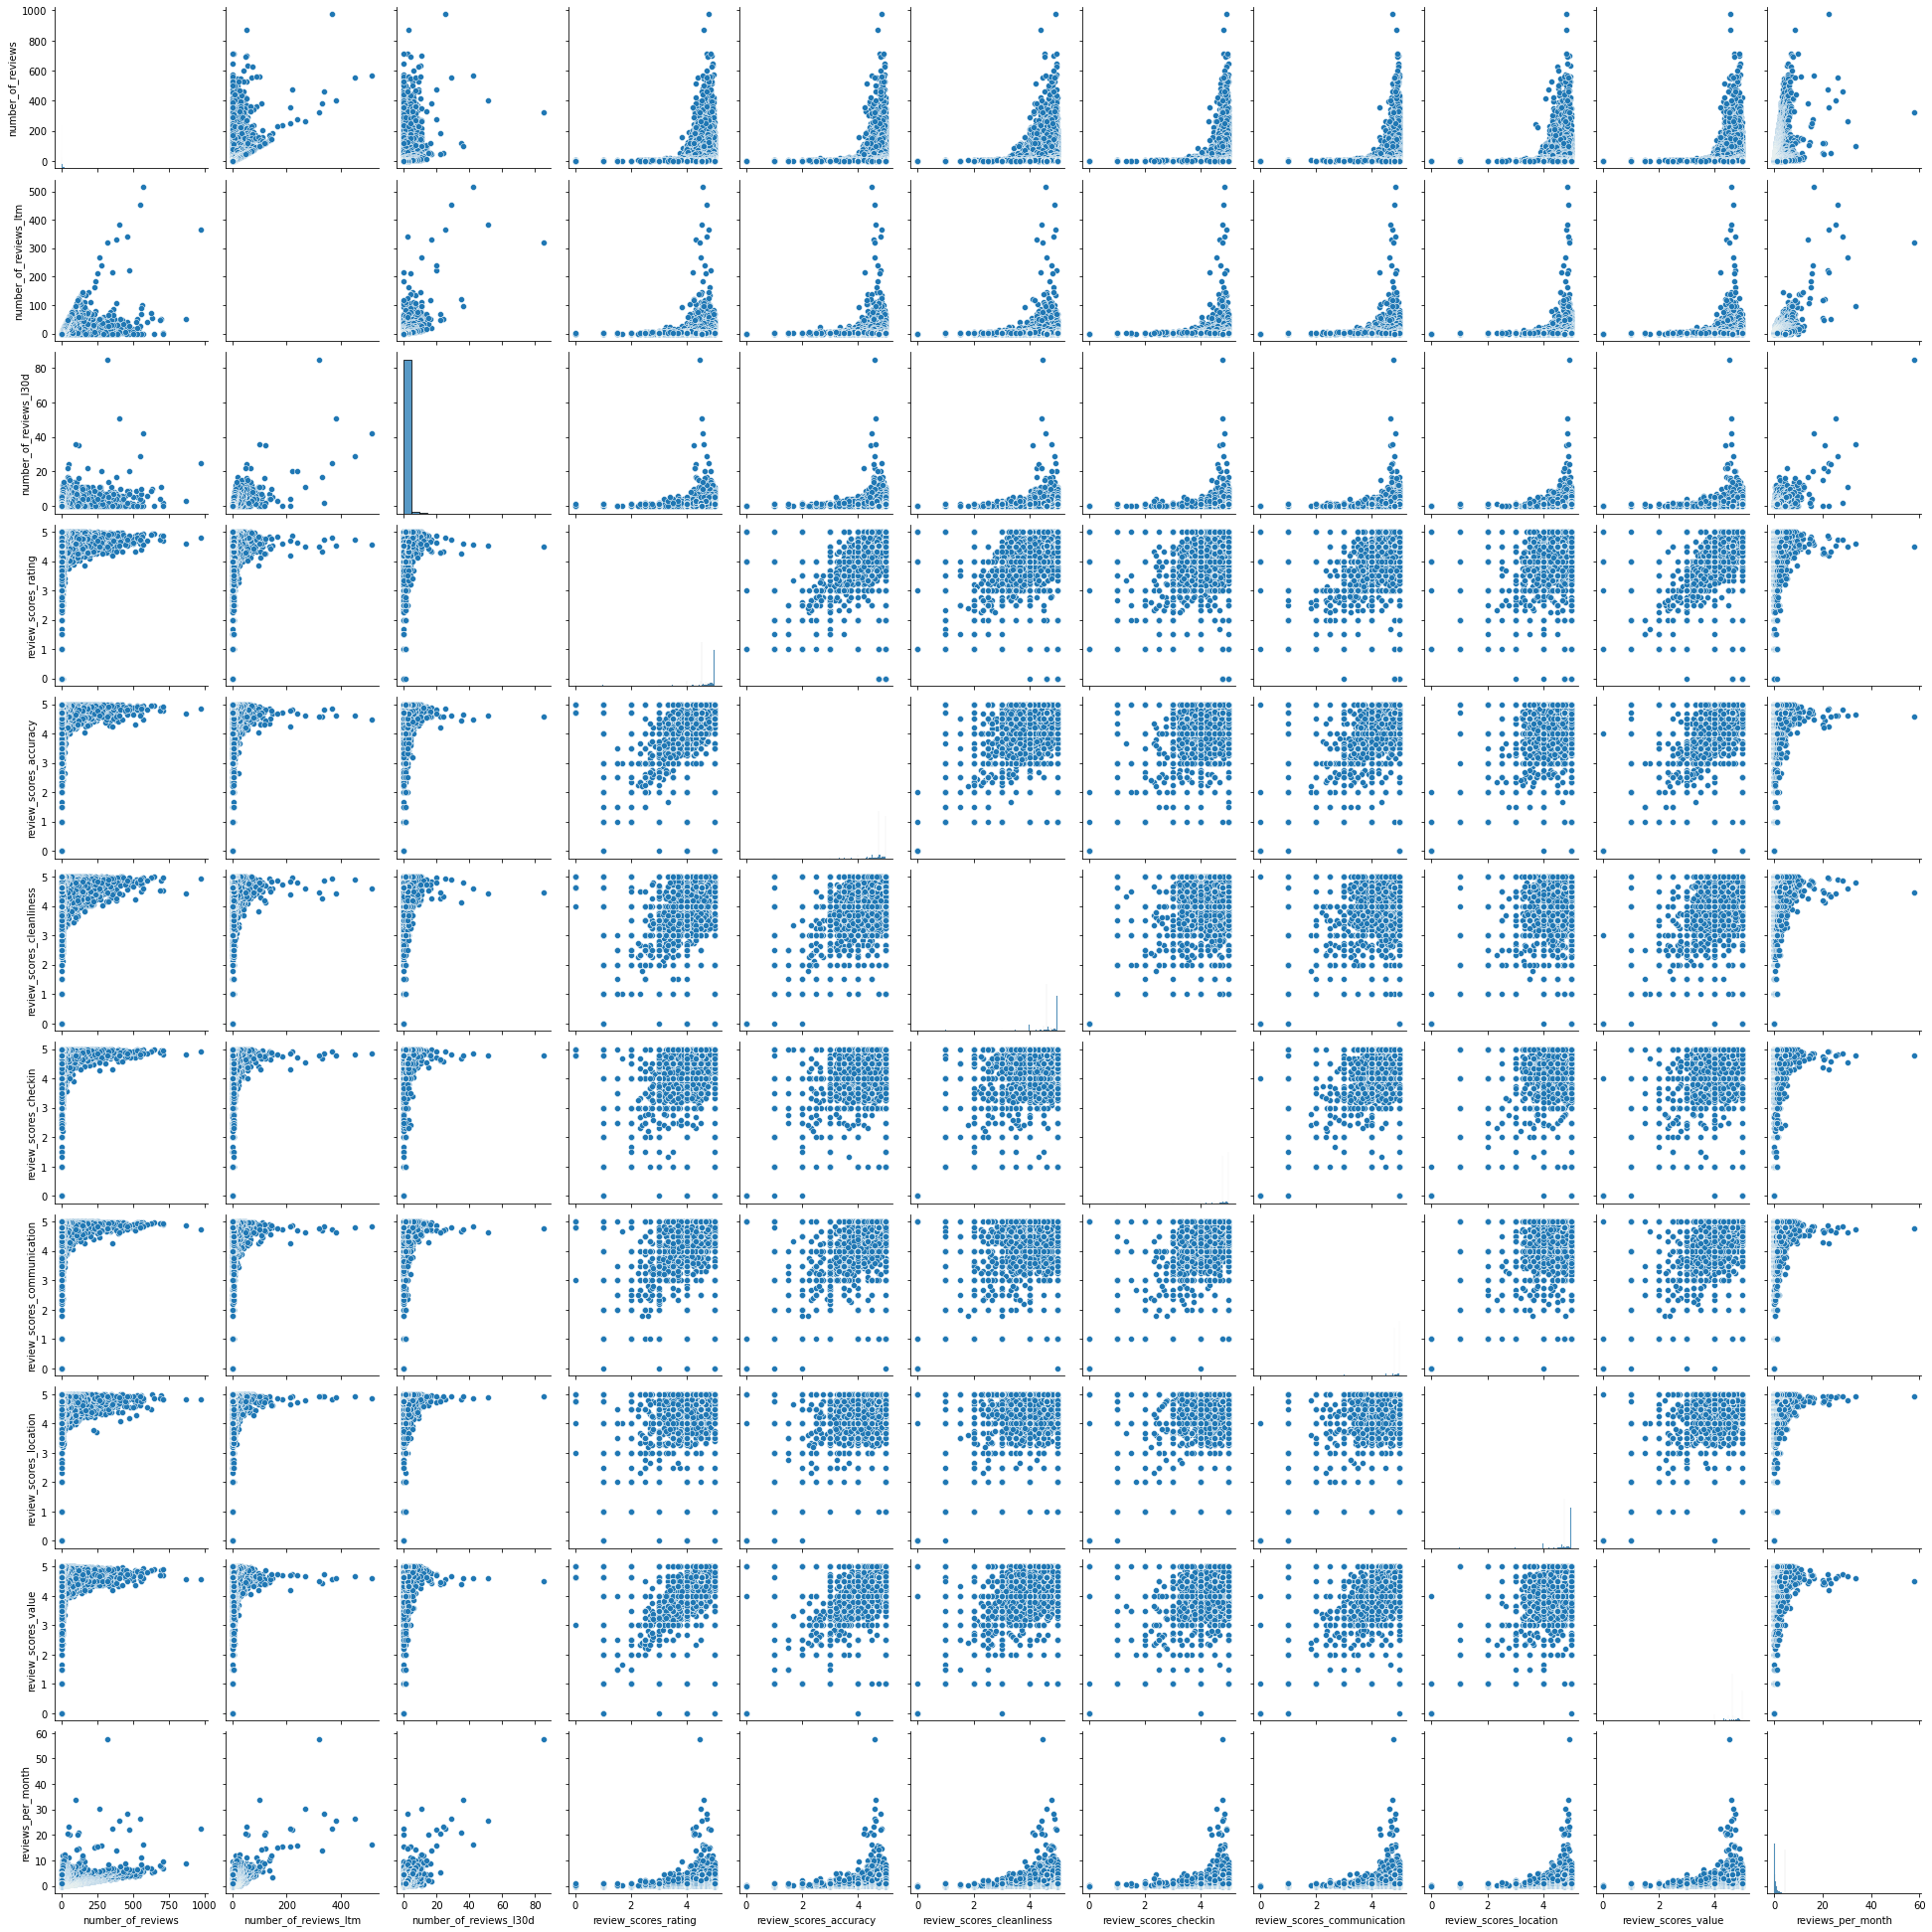

In [36]:
# Creating pair plot 2

g = sns.pairplot(sub_pp2)

> ### COMMENT: On PP2 I can also see that apart from a few strong outliers, most of the data is within the same range. Particularly the review scores are very similar to one another, so as noted previously I understand as "if guest are happy they are generally happy about all aspects of the Airbnb". 

In [37]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_resp_rate_pct', 'host_accept_rate_pct', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price_usd', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_

In [38]:
# PAIR PLOT 3 - Keeping only some variables

sub_pp3 = df[['minimum_nights', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']]

In [39]:
# Renaming columns to create a redable pair plot

sub_pp3.rename(columns = {'calculated_host_listings_count' : 'host_cnt_list', 
                          'calculated_host_listings_count_entire_homes' : 'host_cnt_homes',
                         'calculated_host_listings_count_private_rooms' : 'host_cnt_pvt_rooms',
                         'calculated_host_listings_count_shared_rooms' : 'host_cnt_shd_rooms'}, inplace = True)

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


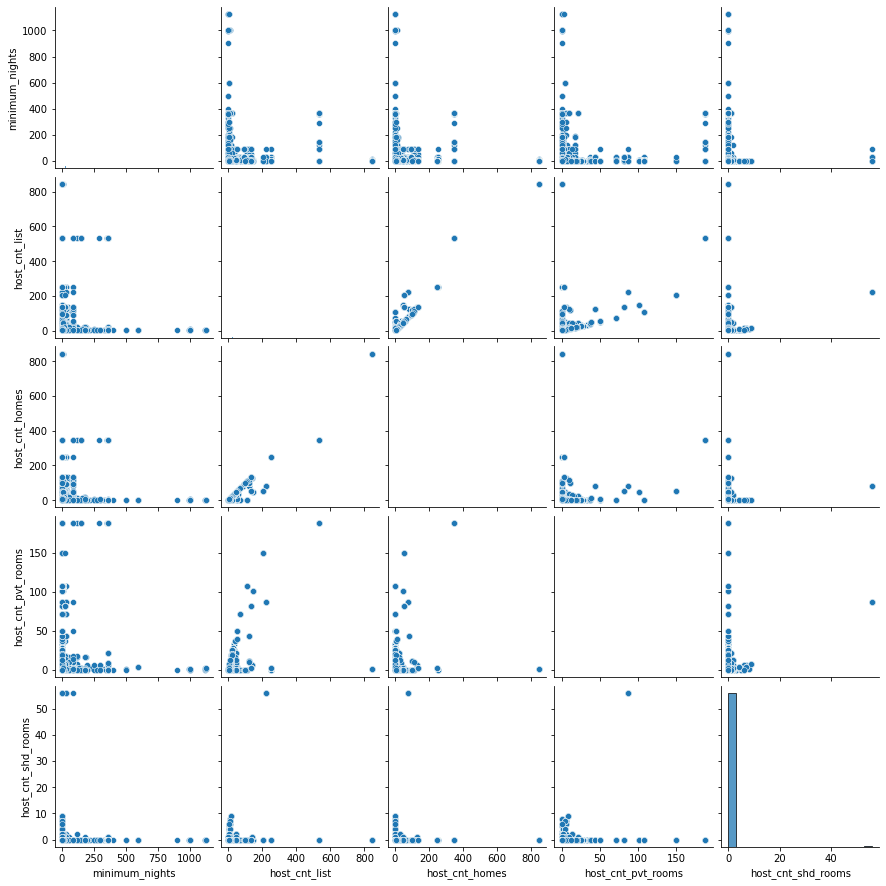

In [40]:
# Creating pair plot 3

g = sns.pairplot(sub_pp3)

In [41]:
sub_pp3[['host_cnt_list','host_cnt_homes','host_cnt_pvt_rooms','host_cnt_shd_rooms']].describe()

,host_cnt_list,host_cnt_homes,host_cnt_pvt_rooms,host_cnt_shd_rooms
count,66582.000000,66582.000000,66582.000000,66582.000000
mean,25.250698,20.744706,4.227975,0.212295
std,109.232299,101.799120,20.927294,3.241996
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000
max,845.000000,844.000000,188.000000,56.000000


> ### COMMENT: On PP3, I can see that a few hosts have many more listings than the average. For example, one host has 845 listings, when 75% of hosts have 3 or less. Likewise for all other categories. It will be interesting to separate the dataset into "normal" vs "outlier" hosts, to really dig deeper into trends amongst the normal host (75%) and isolate "greedy" Airbnb users (who are probably breaking many laws by having so many listings..). 

## D. CATEGORICAL PLOTS

#### CATEGORICAL PLOT 1

<AxesSubplot:xlabel='room_type', ylabel='Count'>

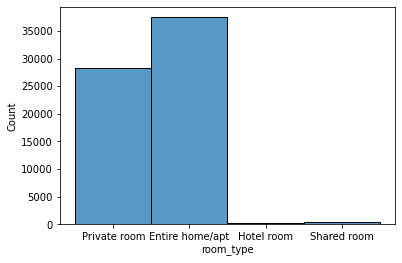

In [42]:
# Categorical Plot 1 - looking at trend in room type
# Most listings are for entire homes, followed closely by private rooms; 
# Hotel rooms & shared rooms are not popular at all. 

sns.histplot(df['room_type'], bins = 4)

In [43]:
# Categorical Plot 1 - the values

df['room_type'].value_counts()

Entire home/apt    37452
Private room       28365
Shared room          510
Hotel room           255
Name: room_type, dtype: int64

#### CATEGORICAL PLOT 2

<AxesSubplot:xlabel='host_response_time', ylabel='Count'>

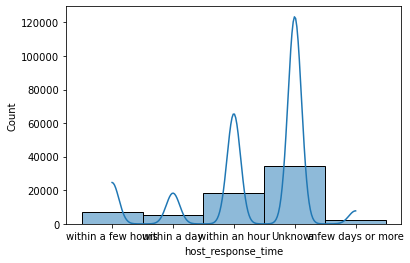

In [44]:
# Categorical Plot 2 - looking at trends in response time
# Mostly the data for this is Unknown, however aside from this, most hosts respond within the hour
# If not within the hour, hosts usualy reply within a few hours or within a day. 

sns.histplot(df['host_response_time'], bins = 10, kde = True)

In [45]:
# Categorical Plot 2 - the values

df['host_response_time'].value_counts()

Unknown               34275
within an hour        18223
within a few hours     6840
within a day           5088
a few days or more     2156
Name: host_response_time, dtype: int64

#### CATEGORICAL PLOT 3

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

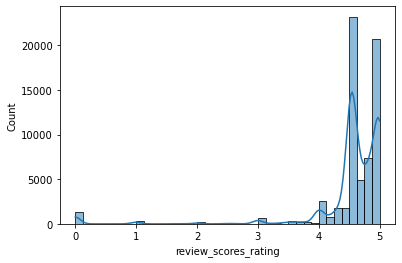

In [46]:
# Most reviews lie between 4.5-5 stars, particulalry the exact number 4.5 & 5 stars. 

sns.histplot(df['review_scores_rating'], bins = 40, kde = True)

#### CATEGORICAL PLOT 4

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

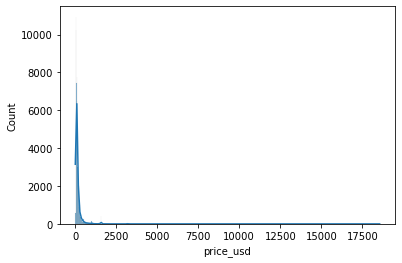

In [47]:
# Looking at prices, the outliers are making it difficult to see

sns.histplot(df['price_usd'], bins = 1000, kde = True)

In [48]:
# Dropping the outliers

df_price_b500 = df.drop(df[(df['price_usd'] > 500)].index)

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

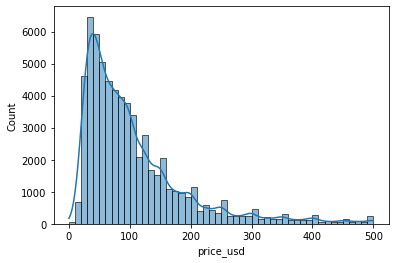

In [49]:
# Here I can see that most listing are below $150 a night. 

sns.histplot(df_price_b500['price_usd'], bins = 50, kde = True)

#### CATEGORICAL PLOT 5

##### Preparing the data

In [50]:
df.loc[df['review_scores_rating'] < 3.5, 'review_category'] = 'bad'

In [51]:
df.loc[(df['review_scores_rating'] >= 3.5) & (df['review_scores_rating'] <= 4.4), 'review_category'] = 'average'

In [52]:
df.loc[df['review_scores_rating'] > 4.4, 'review_category'] = 'excellent'

In [53]:
df['review_category'].value_counts(dropna = False)

excellent    57341
average       6569
bad           2672
Name: review_category, dtype: int64

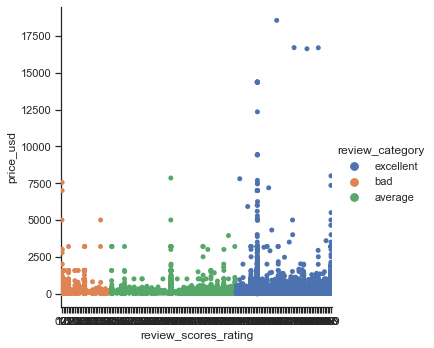

In [54]:
# Create a categorical plot in seaborn using the review categories created above

sns.set(style="ticks")
g = sns.catplot(x="review_scores_rating", y="price_usd", hue="review_category", data=df)

# 6. New Questions & Hypotheses

### This dataset is very thorough and contains many variables, therefore many correlations can be explored and many questions emerge. 

### I feel like it would be interesting to further explore relationships of different groups, for example

> #### 'room_type' > explore trends for both entire homes & private rooms separatly
> #### 'host_cnt_list' > study "normal average hosts" and "greedy" hosts separatly, to identify trends
> #### identify what constitue a badly reviewed listing

### QUESTIONS

> #### How many hosts have more than 3 listings? Shoudl they be dropped from the dataset?
> #### How many listings are over $500 a night? Do they skew the rest of the data? 
> #### Why do some listings have a high threshold of minium nights

### SOME HYPOTHESES TO EXPLORE

> #### If a host is a superhost, then they have a better review-score than the average non-superhost
> #### If a listing is instant bookable, then it will be less available
> #### If a Airbnb is in a central neighbourhood, then it will be more expensive
> #### If a host respond fast, then they will have better rating


### FURTHER FINDINGS TO EXPLORE 

In [55]:
# Looking at the property types, some interesting descriptions came up, such as: 
# 'Yurt', 'Shared room in bus', etc - I think it would be interesting to find the weirdest Airbnbs in London!

df['property_type'].value_counts()

Entire rental unit                  25287
Private room in rental unit         14331
Private room in residential home     9093
Entire residential home              5109
Entire condominium (condo)           3762
                                    ...  
Shared room in earth house              1
Shared room in bus                      1
Yurt                                    1
Private room in parking space           1
Shared room in villa                    1
Name: property_type, Length: 93, dtype: int64